In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

%matplotlib inline  


In [98]:
data_path = r"C:\\Users\\Armin\\Documents\\Code\\Studienarbeit\\crypto_daten_kaggle\\"
btc = pd.read_hdf('Data/btc_cash_train_V1.h5')
btc.head(5)

,Count,Volume,VWAP,mean_trade,upper_Shadow,lower_Shadow,shadow3,shadow5,mean1,UPS,...,Log_Low,Log_Close,Minute,Day,Month,Year,DayOfWeek,minute_seasonal,correlation_log_perf,Label
0,75.0,36.059850,2326.763386,0.480798,33.483333,26.290000,0.928549,0.729066,0.828807,33.483333,...,-0.000304,-0.000074,0,1,1,2018,0,0.000031,-0.044188,0
1,37.0,4.900640,2324.498816,0.132450,28.463333,22.230000,5.808085,4.536143,5.172114,28.463333,...,0.000565,-0.001187,1,1,1,2018,0,0.000000,-0.035099,1
2,58.0,7.652354,2325.722340,0.131937,27.243333,23.130000,3.560124,3.022599,3.291362,27.243333,...,0.000043,0.000430,2,1,1,2018,0,-0.000007,0.084921,0
3,57.0,18.607982,2325.797412,0.326456,26.840000,22.640000,1.442392,1.216682,1.329537,26.840000,...,0.000217,0.000443,3,1,1,2018,0,-0.000016,0.292420,0
4,47.0,26.689645,2325.782199,0.567865,24.503333,23.196667,0.918084,0.869126,0.893605,24.503333,...,-0.000087,0.000703,4,1,1,2018,0,0.000000,-0.221879,1


In [99]:
#btc = crypto_df[crypto_df["Asset_ID"]==1]
#btc["timestamp"] = pd.to_datetime(btc["timestamp"], unit='s')
#btc.set_index("timestamp",inplace=True)

In [4]:
btc_df = pd.read_hdf('Data/' + str(1) + '_V1.h5')
btc_df = btc_df.loc['2017-01-01':'2020-31-12']

In [6]:
len(btc_df.index)

300

In [100]:

btc.reset_index(drop=True)

,Count,Volume,VWAP,mean_trade,upper_Shadow,lower_Shadow,shadow3,shadow5,mean1,UPS,...,Log_Low,Log_Close,Minute,Day,Month,Year,DayOfWeek,minute_seasonal,correlation_log_perf,Label
0,75.0,36.059850,2326.763386,0.480798,33.483333,26.290000,0.928549,0.729066,0.828807,33.483333,...,-0.000304,-0.000074,0,1,1,2018,0,0.000031,-0.044188,0
1,37.0,4.900640,2324.498816,0.132450,28.463333,22.230000,5.808085,4.536143,5.172114,28.463333,...,0.000565,-0.001187,1,1,1,2018,0,0.000000,-0.035099,1
2,58.0,7.652354,2325.722340,0.131937,27.243333,23.130000,3.560124,3.022599,3.291362,27.243333,...,0.000043,0.000430,2,1,1,2018,0,-0.000007,0.084921,0
3,57.0,18.607982,2325.797412,0.326456,26.840000,22.640000,1.442392,1.216682,1.329537,26.840000,...,0.000217,0.000443,3,1,1,2018,0,-0.000016,0.292420,0
4,47.0,26.689645,2325.782199,0.567865,24.503333,23.196667,0.918084,0.869126,0.893605,24.503333,...,-0.000087,0.000703,4,1,1,2018,0,0.000000,-0.221879,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1953383,252.0,347.200008,535.687961,1.377778,0.636667,0.560000,0.001834,0.001613,0.001723,0.636667,...,0.000524,0.001550,26,20,9,2021,0,0.000000,0.035192,0
1953384,259.0,301.212668,536.187658,1.162983,0.298000,0.950000,0.000989,0.003154,0.002072,0.298000,...,0.000523,0.001768,27,20,9,2021,0,0.000000,-0.027693,0
1953385,356.0,484.324177,536.602570,1.360461,0.930000,0.653333,0.001920,0.001349,0.001635,0.930000,...,0.001326,-0.000799,28,20,9,2021,0,0.000007,-0.079963,0
1953386,222.0,235.811114,536.221771,1.062212,0.336000,0.376000,0.001425,0.001594,0.001510,0.336000,...,-0.000280,-0.000797,29,20,9,2021,0,-0.000003,-0.058462,0


In [101]:
btc.index = btc.index.astype("int")
btc = btc.reset_index(drop=True)

In [102]:
type(btc.index)

pandas.core.indexes.range.RangeIndex

In [103]:
btc.index
size = (len(btc.index))/5
btc_train = btc.iloc[:int(size)*4]
btc_test = btc.iloc[int(size*4+1):]


In [104]:
btc.tail()

,Count,Volume,VWAP,mean_trade,upper_Shadow,lower_Shadow,shadow3,shadow5,mean1,UPS,...,Log_Low,Log_Close,Minute,Day,Month,Year,DayOfWeek,minute_seasonal,correlation_log_perf,Label
1953383,252.0,347.200008,535.687961,1.377778,0.636667,0.560000,0.001834,0.001613,0.001723,0.636667,...,0.000524,0.001550,26,20,9,2021,0,0.000000,0.035192,0
1953384,259.0,301.212668,536.187658,1.162983,0.298000,0.950000,0.000989,0.003154,0.002072,0.298000,...,0.000523,0.001768,27,20,9,2021,0,0.000000,-0.027693,0
1953385,356.0,484.324177,536.602570,1.360461,0.930000,0.653333,0.001920,0.001349,0.001635,0.930000,...,0.001326,-0.000799,28,20,9,2021,0,0.000007,-0.079963,0
1953386,222.0,235.811114,536.221771,1.062212,0.336000,0.376000,0.001425,0.001594,0.001510,0.336000,...,-0.000280,-0.000797,29,20,9,2021,0,-0.000003,-0.058462,0
1953387,349.0,401.592469,535.815668,1.150695,0.753333,0.350000,0.001876,0.000872,0.001374,0.753333,...,-0.001962,-0.002009,30,20,9,2021,0,0.000011,0.036344,0


In [105]:
size*4

1562710.4

In [106]:
len(btc_train.index)

1562708

In [107]:
btc_train.head(100)

,Count,Volume,VWAP,mean_trade,upper_Shadow,lower_Shadow,shadow3,shadow5,mean1,UPS,...,Log_Low,Log_Close,Minute,Day,Month,Year,DayOfWeek,minute_seasonal,correlation_log_perf,Label
0,75.0,36.059850,2326.763386,0.480798,33.483333,26.290000,0.928549,0.729066,0.828807,33.483333,...,-0.000304,-0.000074,0,1,1,2018,0,0.000031,-0.044188,0
1,37.0,4.900640,2324.498816,0.132450,28.463333,22.230000,5.808085,4.536143,5.172114,28.463333,...,0.000565,-0.001187,1,1,1,2018,0,0.000000,-0.035099,1
2,58.0,7.652354,2325.722340,0.131937,27.243333,23.130000,3.560124,3.022599,3.291362,27.243333,...,0.000043,0.000430,2,1,1,2018,0,-0.000007,0.084921,0
3,57.0,18.607982,2325.797412,0.326456,26.840000,22.640000,1.442392,1.216682,1.329537,26.840000,...,0.000217,0.000443,3,1,1,2018,0,-0.000016,0.292420,0
4,47.0,26.689645,2325.782199,0.567865,24.503333,23.196667,0.918084,0.869126,0.893605,24.503333,...,-0.000087,0.000703,4,1,1,2018,0,0.000000,-0.221879,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92.0,53.981799,2362.261237,0.586759,12.826667,21.000000,0.237611,0.389020,0.313315,12.826667,...,-0.001707,-0.000064,35,1,1,2018,0,-0.000004,-0.062594,1
96,44.0,38.555631,2371.012205,0.876264,30.983333,31.133333,0.803601,0.807491,0.805546,30.983333,...,-0.000299,0.003986,36,1,1,2018,0,0.000000,-0.144248,1
97,89.0,88.038761,2354.835560,0.989200,14.650000,19.005000,0.166404,0.215871,0.191137,14.650000,...,-0.001968,-0.007080,37,1,1,2018,0,0.000000,0.042555,1
98,25.0,14.466920,2351.083132,0.578677,18.100000,15.035000,1.251130,1.039268,1.145199,18.100000,...,-0.000814,-0.002496,38,1,1,2018,0,-0.000014,0.003129,1


In [108]:
len(btc_test)

390677

In [109]:
btc["Vola"] = btc.Close.rolling(60).std()/btc.Close

C:\Users\Armin\AppData\Local\Temp/ipykernel_29964/42236165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc["Vola"] = btc.Close.rolling(60).std()/btc.Close


In [110]:
btc["Vola"].corr(btc["Target"])

-0.007543647034282099

In [111]:
btc["Target_abs"] = abs(btc["Target"])

C:\Users\Armin\AppData\Local\Temp/ipykernel_29964/2361835580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc["Target_abs"] = abs(btc["Target"])


In [112]:
btc["Vola"].corr(btc["Target_abs"])

0.2967167315513721

In [113]:
btc = btc.dropna()

In [114]:
btc["Vola"].size

1956223

In [115]:
def applyFunc(s):
    if s > 0.03:
        return 0.03
    else:
        return s

btc["Target_abs"] = btc["Target_abs"].apply(applyFunc)

In [116]:
X = pd.DataFrame(btc["Vola"])
y = pd.DataFrame(btc["Target_abs"])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
print(scores)

[0.09065240014725595, 0.09121474768324567, 0.09266394340584383]


<AxesSubplot:>

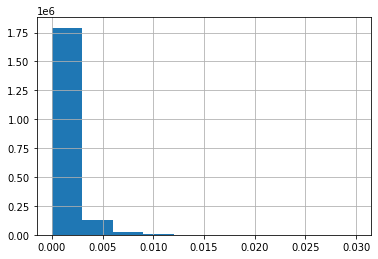

In [117]:
y.Target_abs.hist()

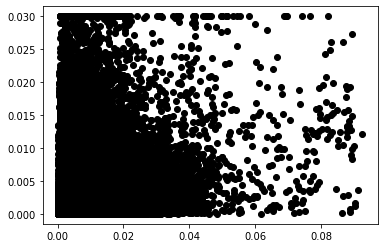

In [118]:
plt.scatter(X, y, color="black")
#plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()

In [119]:
btc = featureCreatenClass.createFeature(btc)

NameError: name 'featureCreatenClass' is not defined

In [ ]:
btc = btc.dropna()
btc = featureCreatenClass.detect_outliers(btc)


In [ ]:
btc = featureCreatenClass.feature_seasonal(btc)
btc = btc.dropna()
btc.head()

,index,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,...,Log_Open,Log_Low,Log_Close,Minute,Day,Month,Year,DayOfWeek,minute_seasonal,correlation_log_perf
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-02 01:00:00,11571,1,365.0,13826.476000,13999.0,13730.06,13814.688,45.653487,13824.325258,-0.004452,...,0.000748,0.000052,-0.002211,0,2,1,2018,1,0.000011,0.129154
2018-01-02 01:01:00,11579,1,282.0,13821.124000,13998.4,13729.89,13843.832,66.165220,13831.112715,-0.004125,...,-0.000387,-0.000012,0.002107,1,2,1,2018,1,0.000013,0.163874
2018-01-02 01:02:00,11587,1,428.0,13836.020000,13997.8,13730.08,13841.114,109.868275,13852.554926,-0.003243,...,0.001077,0.000014,-0.000196,2,2,1,2018,1,-0.000002,-0.118839
2018-01-02 01:03:00,11595,1,386.0,13846.475315,13949.0,13750.00,13842.120,58.582471,13844.013004,-0.003327,...,0.000755,0.001450,0.000073,3,2,1,2018,1,-0.000001,-0.079269
2018-01-02 01:04:00,11603,1,314.0,13844.268000,13999.0,13748.81,13841.298,53.445203,13849.569594,-0.003289,...,-0.000159,-0.000087,-0.000059,4,2,1,2018,1,-0.000006,0.131973


# LSTM - Klassifikation

In [120]:
btc_target_label = []

In [121]:
for index,value in btc["Target"].items():
    if value < 0:
        btc_target_label.append(1)
    elif value > 0:
        btc_target_label.append(0)
    else:
        btc_target_label.append(0)

In [122]:
np.histogram(btc_target_label)

(array([964340,      0,      0,      0,      0,      0,      0,      0,
             0, 991883], dtype=int64),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))

In [ ]:
btc_y = np.array(btc_target_label)
btc_x = btc.drop(["Target","Asset_ID","index","Open","High","Low","Close"], axis=1).reset_index(drop=True)

In [ ]:
scaler = StandardScaler()
scaler = scaler.fit(btc_x)
btc_x_scaled = scaler.transform(btc_x)
btc_target_label = btc_target_label[:-35]

In [ ]:
n_future = 1 #Naechste 15min prädizieren
n_past = 35

In [ ]:
train_x = []
train_y = []
for i in range(n_past,len(btc_x_scaled)-n_future+1):
    train_x.append(btc_x_scaled[i-n_past:i, 0:btc_x_scaled.shape[1]])
train_x,train_y = np.array(train_x), np.array(btc_target_label)

In [ ]:
print(train_x.shape)
print(train_y)

(1954718, 35, 70)
[1 1 1 ... 0 0 0]


In [ ]:
model = Sequential()
model.add(LSTM(256,activation='tanh', input_shape=(35,70), return_sequences=True))
model.add(LSTM(128,activation='tanh', input_shape=(35,70), return_sequences=True))
model.add(LSTM(32,activation='tanh', input_shape=(35,70), return_sequences=True))
model.add(LSTM(16,activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 35, 256)           334848    
                                                                 
 lstm_1 (LSTM)               (None, 35, 128)           197120    
                                                                 
 lstm_2 (LSTM)               (None, 35, 32)            20608     
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 555,729
Trainable params: 555,729
Non-trai

In [ ]:
train_x.shape

(1954718, 35, 70)

In [ ]:
train_y.shape

(1954718,)

In [ ]:
model.fit(
    x = train_x,
    y = train_y,
    epochs=5, 
    batch_size=256
)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.